# Daily Report

We replicate the numbers of cases published in the daily meeting

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
%matplotlib 


Using matplotlib backend: MacOSX


In [2]:

strpath = '../src/'
m = []
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
            df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
            df['deltaSintomas'] = df.deltaSintomas.dt.days
            df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
            df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
            m.append([df.FECHA_ACTUALIZACION.unique()[0]
                      ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
                  ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
                  ,df.ID_REGISTRO.nunique()
                  ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                     ]
            )
    df = pd.DataFrame(m)
    df.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df = df.sort_values(by='date', ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)
else:
    df0 = pd.read_csv('report_data.csv')
    df0.date = pd.to_datetime(df0['date'], format='%Y-%m-%d')
    lastdateRecord = df0.date.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
        df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
        df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
        df['deltaSintomas'] = df.deltaSintomas.dt.days
        df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
        df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
        m.append([df.FECHA_ACTUALIZACION.unique()[0]
                  ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
              ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
              ,df.ID_REGISTRO.nunique()
              ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                 ]
        )
    df1 = pd.DataFrame(m)
    df1.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df1 = df1.sort_values(by='date', ascending=False)
    frames = [df1,df0]
    df = pd.concat(frames)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)

In [3]:
column = df.columns[1:]
for each in column:
    column_name = '∆ '+ each
    df[column_name] = df[each] - df[each].shift(-1)
    column_name1 = '% '+ each
    df[column_name1] = (df[column_name]/ df[column_name].shift(-1))*100

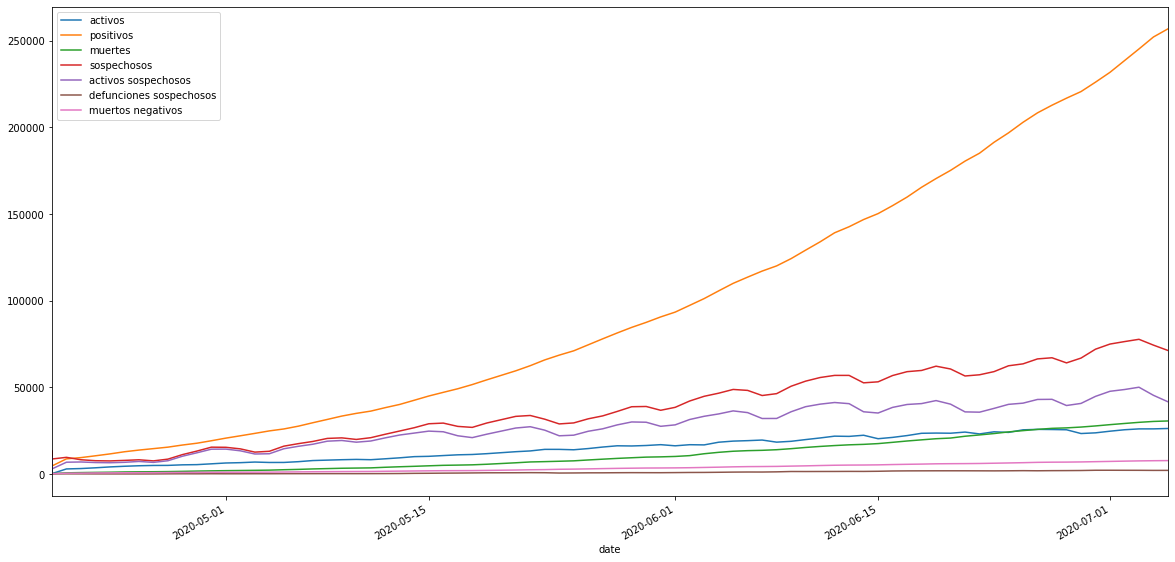

In [4]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

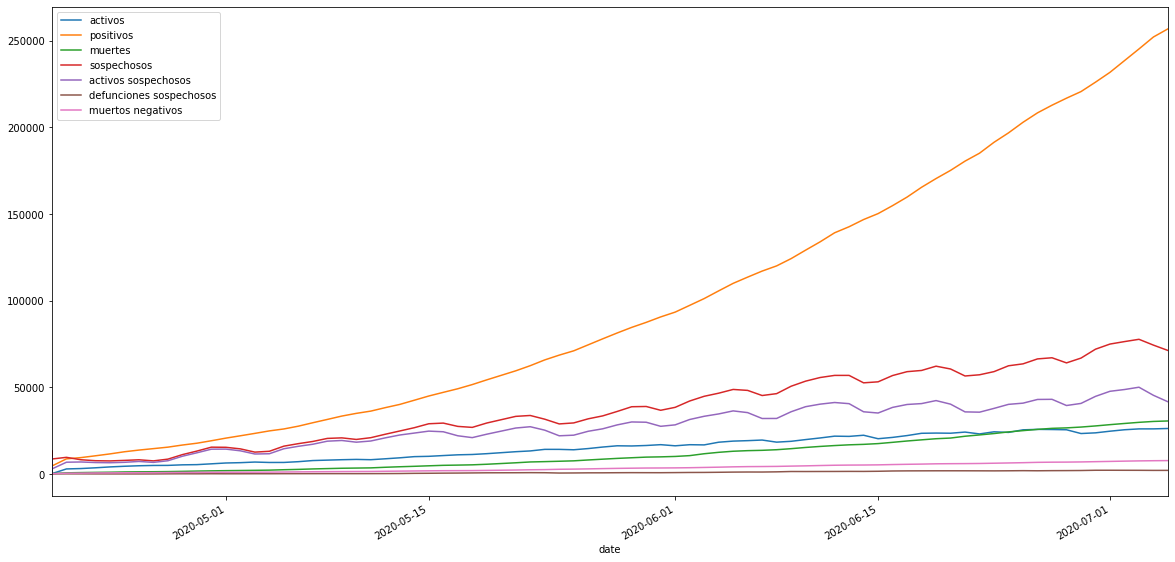

In [5]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

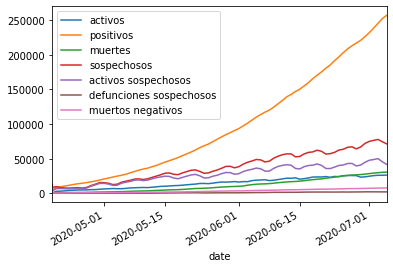

In [6]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot()

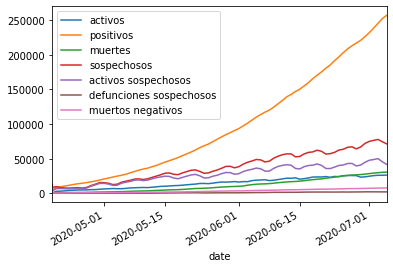

In [7]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot()

In [8]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-07-05,26295,256848,30639,71305,641142,41706,2128,7775
1,2020-07-04,26075,252165,30366,74387,634991,45435,2121,7706
2,2020-07-03,26063,245251,29843,77750,624987,50105,2169,7604
3,2020-07-02,25565,238511,29189,76423,610495,48774,2185,7461
4,2020-07-01,24734,231770,28510,75005,595917,47757,2204,7307
5,2020-06-30,23782,226089,27769,72041,581580,44824,2197,7158
6,2020-06-29,23389,220657,27121,66910,566602,40759,2055,7000


In [9]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-07-05,26295,256848,30639,71305,641142,41706,2128,7775
1,2020-07-04,26075,252165,30366,74387,634991,45435,2121,7706
2,2020-07-03,26063,245251,29843,77750,624987,50105,2169,7604
3,2020-07-02,25565,238511,29189,76423,610495,48774,2185,7461
4,2020-07-01,24734,231770,28510,75005,595917,47757,2204,7307
5,2020-06-30,23782,226089,27769,72041,581580,44824,2197,7158
6,2020-06-29,23389,220657,27121,66910,566602,40759,2055,7000


In [10]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos'], df.loc[0]['∆ activos'],df.loc[0]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[0]['positivos'], df.loc[0]['∆ positivos'],df.loc[0]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[0]['muertes'], df.loc[0]['∆ muertes'],df.loc[0]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],df.loc[0]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],df.loc[0]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],df.loc[0]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )


Activos 26295. ∆ 220. % 1833.33
Positivos 256848. ∆ 4683. % 67.73
Muertes 30639. ∆ 273. % 52.20
Sospechosos 71305. ∆ -3082. % 91.64
---Sospechosos---
Activos 41706. ∆ -3729. % 79.85
Defunciones 2128. ∆ 7. % -14.58

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7775. ∆ 69. % 67.65


In [11]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos'], df.loc[1]['∆ activos'],df.loc[1]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[1]['positivos'], df.loc[1]['∆ positivos'],df.loc[1]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[1]['muertes'], df.loc[1]['∆ muertes'],df.loc[1]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[1]['sospechosos'], df.loc[1]['∆ sospechosos'],df.loc[1]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos sospechosos'], df.loc[1]['∆ activos sospechosos'],df.loc[1]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[1]['defunciones sospechosos'], df.loc[1]['∆ defunciones sospechosos'],df.loc[1]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[1]['muertos negativos'], df.loc[1]['∆ muertos negativos'],df.loc[1]['% muertos negativos'],) )


Activos 26075. ∆ 12. % 2.41
Positivos 252165. ∆ 6914. % 102.58
Muertes 30366. ∆ 523. % 79.97
Sospechosos 74387. ∆ -3363. % -253.43
---Sospechosos---
Activos 45435. ∆ -4670. % -350.86
Defunciones 2121. ∆ -48. % 300.00

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7706. ∆ 102. % 71.33


In [12]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos'], df.loc[2]['∆ activos'],df.loc[2]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[2]['positivos'], df.loc[2]['∆ positivos'],df.loc[2]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[2]['muertes'], df.loc[2]['∆ muertes'],df.loc[2]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[2]['sospechosos'], df.loc[2]['∆ sospechosos'],df.loc[2]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos sospechosos'], df.loc[2]['∆ activos sospechosos'],df.loc[2]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[2]['defunciones sospechosos'], df.loc[2]['∆ defunciones sospechosos'],df.loc[2]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[2]['muertos negativos'], df.loc[2]['∆ muertos negativos'],df.loc[2]['% muertos negativos'],) )


Activos 26063. ∆ 498. % 59.93
Positivos 245251. ∆ 6740. % 99.99
Muertes 29843. ∆ 654. % 96.32
Sospechosos 77750. ∆ 1327. % 93.58
---Sospechosos---
Activos 50105. ∆ 1331. % 130.88
Defunciones 2169. ∆ -16. % 84.21

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7604. ∆ 143. % 92.86


## 